                       0       1                                  2  \
0                   name  rating                             genres   
1          alien-romulus    ★★★★    Science Fiction, Action, Horror   
2     deadpool-wolverine     ★★★    Science Fiction, Action, Comedy   
3  a-quiet-place-day-one     ★★★  Thriller, Science Fiction, Horror   
4               maxxxine    ★★★★             Horror, Crime, Mystery   

                 3  
0  avg_user_rating  
1              3.7  
2              3.6  
3              3.2  
4              3.1  
                    name rating                             genres  \
1          alien-romulus   ★★★★    Science Fiction, Action, Horror   
2     deadpool-wolverine    ★★★    Science Fiction, Action, Comedy   
3  a-quiet-place-day-one    ★★★  Thriller, Science Fiction, Horror   
4               maxxxine   ★★★★             Horror, Crime, Mystery   
5  the-last-journey-2024  ★★★★½                        Documentary   

  avg_user_rating  
1     

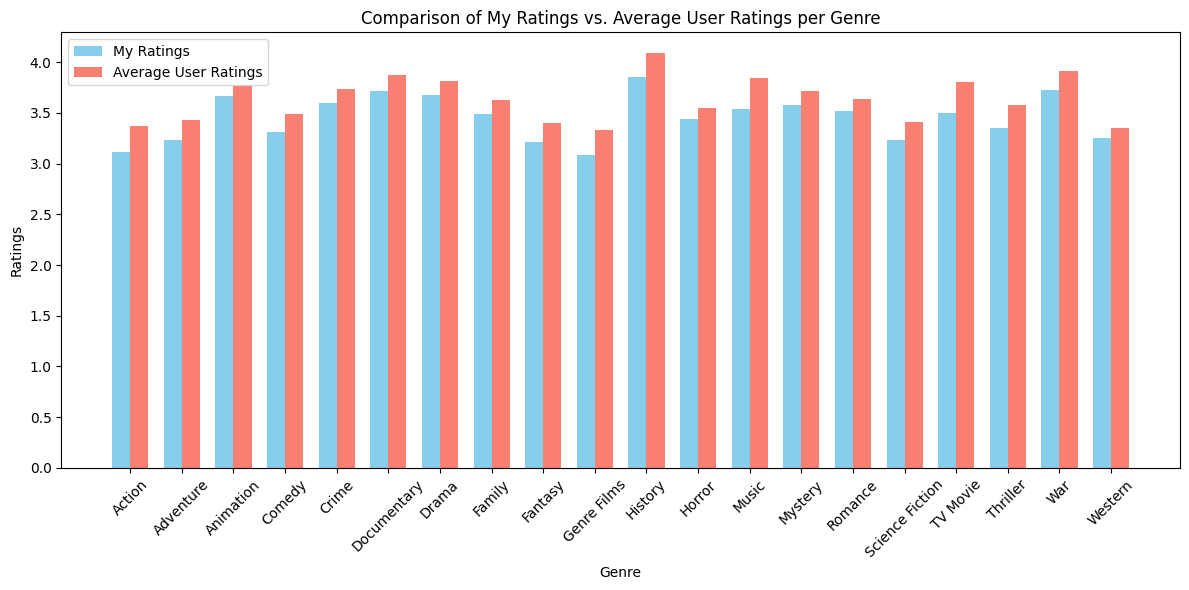

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV file, treating the first row as data
df = pd.read_csv('ludde_letterboxd_films.csv', header=None)

# Check the first few rows to confirm the structure
print(df.head())

# If the first row contains unwanted data, remove it
# This assumes that the first row is the first film entry
df = df.iloc[1:]

# Assign the correct column names
df.columns = ['name', 'rating', 'genres', 'avg_user_rating']

# Print the DataFrame to confirm the structure
print(df.head())

# Convert the rating to a numerical format
rating_map = {
    '½': 0.5,
    '★': 1,
    '★½': 1.5,
    '★★': 2,
    '★★½': 2.5,
    '★★★': 3,
    '★★★½': 3.5,
    '★★★★': 4,
    '★★★★½': 4.5,
    '★★★★★': 5
}
df['rating_num'] = df['rating'].map(rating_map)

# Clean and convert avg_user_rating to float
df['avg_user_rating'] = pd.to_numeric(df['avg_user_rating'], errors='coerce')

# Split genres and explode the DataFrame
df['genres'] = df['genres'].str.split(', ')
df_exploded = df.explode('genres')

# Group by genre and calculate mean ratings
genre_ratings = df_exploded.groupby('genres').agg({
    'rating_num': 'mean',
    'avg_user_rating': 'mean'
}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(genre_ratings))

# Plotting your ratings
plt.bar(x, genre_ratings['rating_num'], width=bar_width, label='My Ratings', color='skyblue')
# Plotting average user ratings
plt.bar([i + bar_width for i in x], genre_ratings['avg_user_rating'], width=bar_width, label='Average User Ratings', color='salmon')

# Customizing the plot
plt.xticks([i + bar_width / 2 for i in x], genre_ratings['genres'], rotation=45)
plt.title('Comparison of My Ratings vs. Average User Ratings per Genre')
plt.xlabel('Genre')
plt.ylabel('Ratings')
plt.legend()
plt.tight_layout()
plt.show()


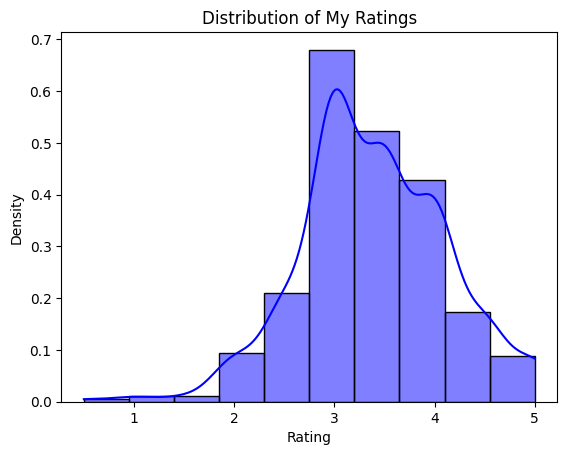

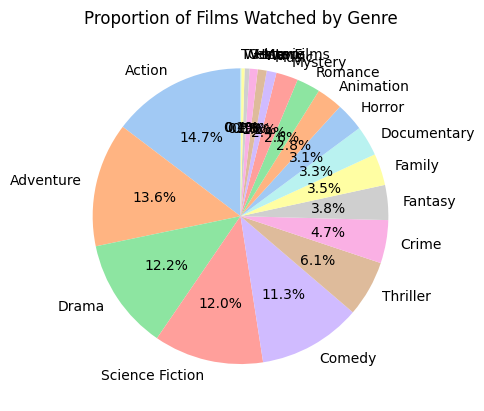

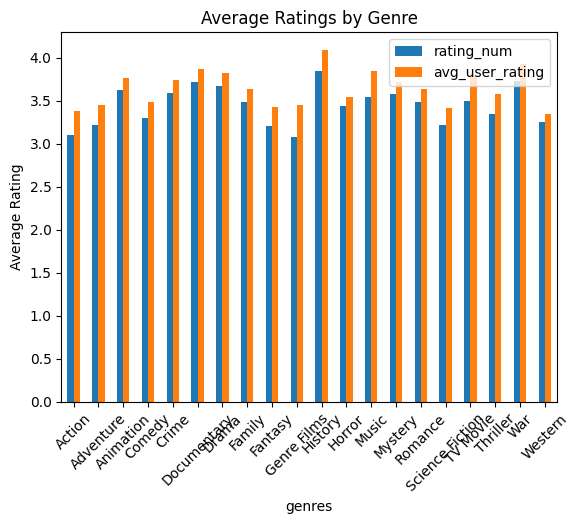

/var/folders/f9/0ycsbjtd5ygdwxd1cn_bk5qw0000gn/T/ipykernel_90322/3463956203.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_num', y='genres', data=top_films, palette='viridis')


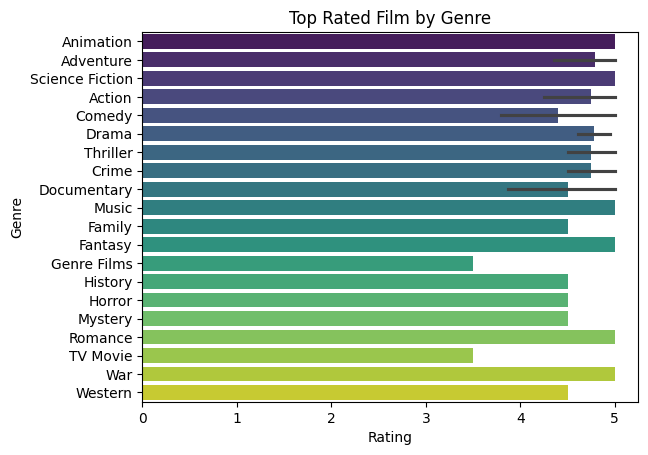

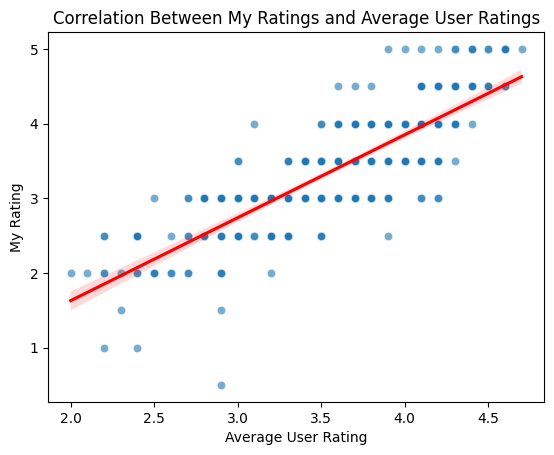

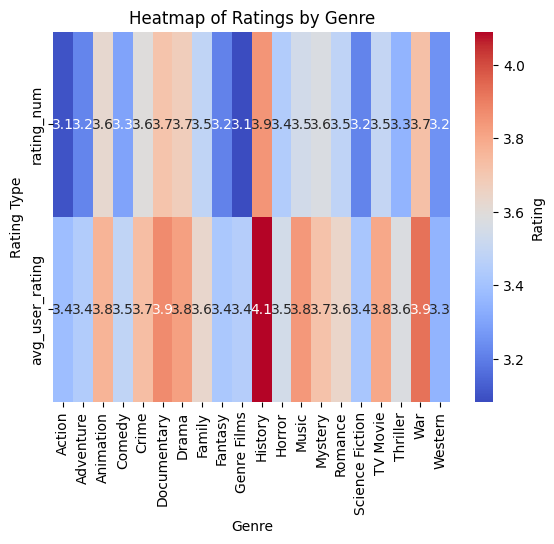

/var/folders/f9/0ycsbjtd5ygdwxd1cn_bk5qw0000gn/T/ipykernel_90322/3463956203.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_frequent_genres.index, y=most_frequent_genres.values, palette='Set2')


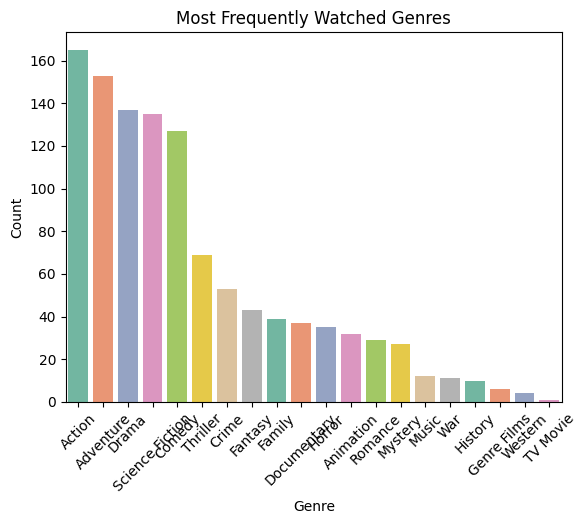

/var/folders/f9/0ycsbjtd5ygdwxd1cn_bk5qw0000gn/T/ipykernel_90322/3463956203.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_num', y='name', data=comparison_df, palette='Set1')


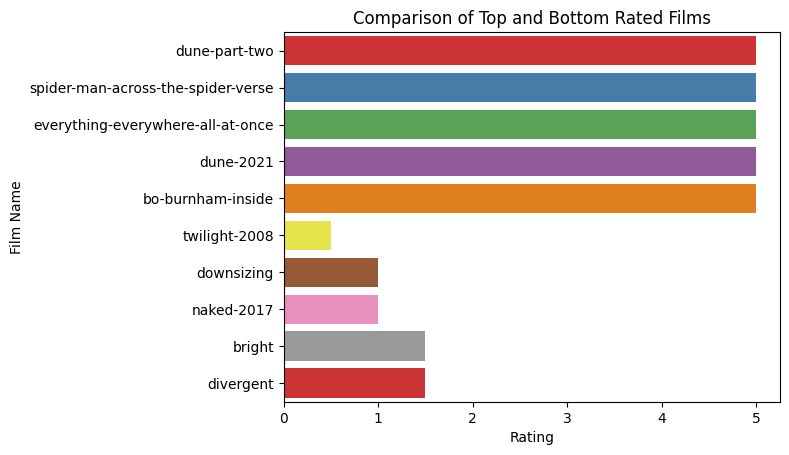

/var/folders/f9/0ycsbjtd5ygdwxd1cn_bk5qw0000gn/T/ipykernel_90322/3463956203.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genres', y='rating_num', data=df_exploded, palette='Set3')


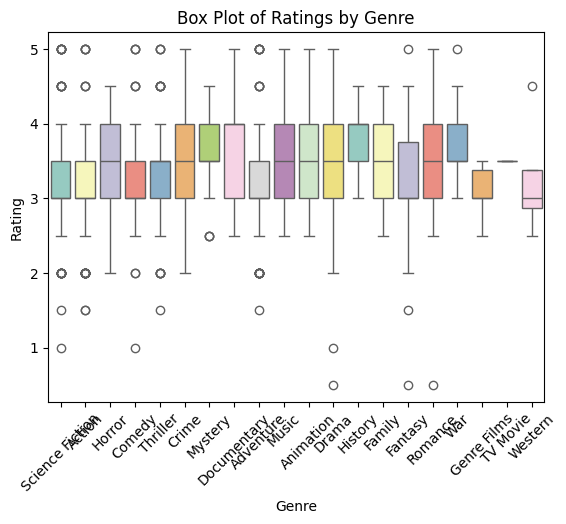

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV file
df = pd.read_csv('ludde_letterboxd_films.csv', header=None)
df = df.iloc[1:]  # Remove the first row
df.columns = ['name', 'rating', 'genres', 'avg_user_rating']

# Convert the rating to a numerical format
rating_map = {
    '½': 0.5,
    '★': 1,
    '★½': 1.5,
    '★★': 2,
    '★★½': 2.5,
    '★★★': 3,
    '★★★½': 3.5,
    '★★★★': 4,
    '★★★★½': 4.5,
    '★★★★★': 5
}
df['rating_num'] = df['rating'].map(rating_map)

# Clean and convert avg_user_rating to float
df['avg_user_rating'] = pd.to_numeric(df['avg_user_rating'], errors='coerce')

# Split genres and explode the DataFrame
df['genres'] = df['genres'].str.split(', ')
df_exploded = df.explode('genres')

# Remove rows with NaN values in key columns
df_exploded.dropna(subset=['rating_num', 'avg_user_rating', 'genres'], inplace=True)

# 1. Distribution of Ratings
# plt.figure(figsize=(12, 6))
sns.histplot(df['rating_num'], bins=10, kde=True, color='blue', stat='density')
plt.title('Distribution of My Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

# 2. Genre Breakdown
genre_counts = df_exploded['genres'].value_counts()
# plt.figure(figsize=(12, 6))
genre_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Films Watched by Genre')
plt.ylabel('')
plt.show()

# 3. Average Ratings by Genre
avg_ratings = df_exploded.groupby('genres').agg({'rating_num': 'mean', 'avg_user_rating': 'mean'}).reset_index()
# plt.figure(figsize=(12, 6))
avg_ratings.set_index('genres').plot.bar()
plt.title('Average Ratings by Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

# 5. Top Films by Genre
top_films = df_exploded.loc[df_exploded.groupby('genres')['rating_num'].idxmax()]
# plt.figure(figsize=(12, 6))
sns.barplot(x='rating_num', y='genres', data=top_films, palette='viridis')
plt.title('Top Rated Film by Genre')
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.show()

# 6. Correlation Analysis
# plt.figure(figsize=(12, 6))
sns.scatterplot(x='avg_user_rating', y='rating_num', data=df, alpha=0.6)
sns.regplot(x='avg_user_rating', y='rating_num', data=df, scatter=False, color='red')
plt.title('Correlation Between My Ratings and Average User Ratings')
plt.xlabel('Average User Rating')
plt.ylabel('My Rating')
plt.show()

# 7. Heatmap of Ratings by Genre
heatmap_data = df_exploded.groupby('genres').agg({'rating_num': 'mean', 'avg_user_rating': 'mean'}).T
# plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar_kws={'label': 'Rating'})
plt.title('Heatmap of Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating Type')
plt.show()

# 8. Most Frequent Genres
most_frequent_genres = df_exploded['genres'].value_counts()
#plt.figure(figsize=(12, 6))
sns.barplot(x=most_frequent_genres.index, y=most_frequent_genres.values, palette='Set2')
plt.title('Most Frequently Watched Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 9. Comparison of Top and Bottom Rated Films
top_films_to_plot = df.nlargest(5, 'rating_num')
bottom_films_to_plot = df.nsmallest(5, 'rating_num')
comparison_df = pd.concat([top_films_to_plot, bottom_films_to_plot])
# plt.figure(figsize=(12, 6))
sns.barplot(x='rating_num', y='name', data=comparison_df, palette='Set1')
plt.title('Comparison of Top and Bottom Rated Films')
plt.xlabel('Rating')
plt.ylabel('Film Name')
plt.show()

# 10. Box Plots for Ratings by Genre
# plt.figure(figsize=(12, 6))
sns.boxplot(x='genres', y='rating_num', data=df_exploded, palette='Set3')
plt.title('Box Plot of Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


In [35]:
# Calculate the difference between my rating and the average user rating
df['rating_difference'] = df['rating_num'] - df['avg_user_rating']

# Sort by the absolute difference
df['abs_difference'] = df['rating_difference'].abs()
biggest_differences = df.sort_values(by='abs_difference', ascending=False)

# Print the top 10 movies with the biggest rating differences
top_differences = biggest_differences[['name', 'rating_num', 'avg_user_rating', 'rating_difference']].head(50)
print("Movies with the biggest differences between my rating and the average user rating:")
print(top_differences)


Movies with the biggest differences between my rating and the average user rating:
                                                  name  rating_num  \
259                                      twilight-2008         0.5   
19                                 john-wick-chapter-4         2.5   
108                                         downsizing         1.0   
175                                          divergent         1.5   
217                                     project-x-2012         2.0   
109                                         naked-2017         1.0   
301                               little-miss-sunshine         3.0   
329                                    kill-bill-vol-1         3.0   
43                                           dune-2021         5.0   
289                                           hot-fuzz         3.0   
426                                              rocky         3.0   
236                                          127-hours         2.5   
184    

In [36]:
# Function to print the top 10 movies by your rating for each genre
def print_top_10_movies_by_genre(df_exploded):
    genres = df_exploded['genres'].unique()  # Get all unique genres
    
    for genre in genres:
        print(f"\nTop 10 movies in the genre: {genre}")
        
        # Filter the DataFrame by genre
        genre_df = df_exploded[df_exploded['genres'] == genre]
        
        # Sort by your rating (rating_num) and get the top 10
        top_10 = genre_df.sort_values(by='rating_num', ascending=False).head(10)
        
        # Print the top 10 movies
        for index, row in top_10.iterrows():
            print(f"Movie: {row['name']}, Your Rating: {row['rating_num']}, Avg User Rating: {row['avg_user_rating']}")

# Call the function
print_top_10_movies_by_genre(df_exploded)



Top 10 movies in the genre: Science Fiction
Movie: her, Your Rating: 5.0, Avg User Rating: 4.0
Movie: dune-2021, Your Rating: 5.0, Avg User Rating: 3.9
Movie: dune-part-two, Your Rating: 5.0, Avg User Rating: 4.4
Movie: everything-everywhere-all-at-once, Your Rating: 5.0, Avg User Rating: 4.3
Movie: spider-man-across-the-spider-verse, Your Rating: 5.0, Avg User Rating: 4.4
Movie: interstellar, Your Rating: 5.0, Avg User Rating: 4.4
Movie: blade-runner-2049, Your Rating: 5.0, Avg User Rating: 4.1
Movie: the-prestige, Your Rating: 4.5, Avg User Rating: 4.2
Movie: walle, Your Rating: 4.5, Avg User Rating: 4.2
Movie: jurassic-park, Your Rating: 4.5, Avg User Rating: 4.1

Top 10 movies in the genre: Action
Movie: the-dark-knight, Your Rating: 5.0, Avg User Rating: 4.5
Movie: spider-man-across-the-spider-verse, Your Rating: 5.0, Avg User Rating: 4.4
Movie: everything-everywhere-all-at-once, Your Rating: 5.0, Avg User Rating: 4.3
Movie: the-lord-of-the-rings-the-return-of-the-king, Your Rati